In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading CSV File

In [39]:
df = pd.read_csv("sales.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### Data Overview

In [40]:
print('Dataset shape:', df.shape)
print('\nDataset Info:')
print(df.info())


Dataset shape: (9800, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales      

### Data Cleaning

In [41]:
# Converting 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Creating Time-Based Features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day

# Checking for Duplicate Entries
print('Number of duplicate entries:', df.duplicated().sum())

# Basic Statistics
print('\nBasic Summary:')
print(df.describe().to_string())

Number of duplicate entries: 0

Basic Summary:
            Row ID                     Order Date                      Ship Date   Postal Code         Sales   Order Year  Order Month    Order Day
count  9800.000000                           3959                           3815   9789.000000   9800.000000  3959.000000  3959.000000  3959.000000
mean   4900.500000  2017-03-14 18:19:11.199798016  2017-04-09 17:04:02.516382720  55273.322403    230.769059  2016.728467     6.452892     8.018186
min       1.000000            2015-01-02 00:00:00            2015-01-04 00:00:00   1040.000000      0.444000  2015.000000     1.000000     1.000000
25%    2450.750000            2016-04-05 00:00:00            2016-04-12 00:00:00  23223.000000     17.248000  2016.000000     3.000000     5.000000
50%    4900.500000            2017-05-02 00:00:00            2017-06-06 00:00:00  58103.000000     54.490000  2017.000000     6.000000     9.000000
75%    7350.250000            2018-03-07 00:00:00            2018

# Exploratory Data Analysis (EDA)

Univariate Analysis

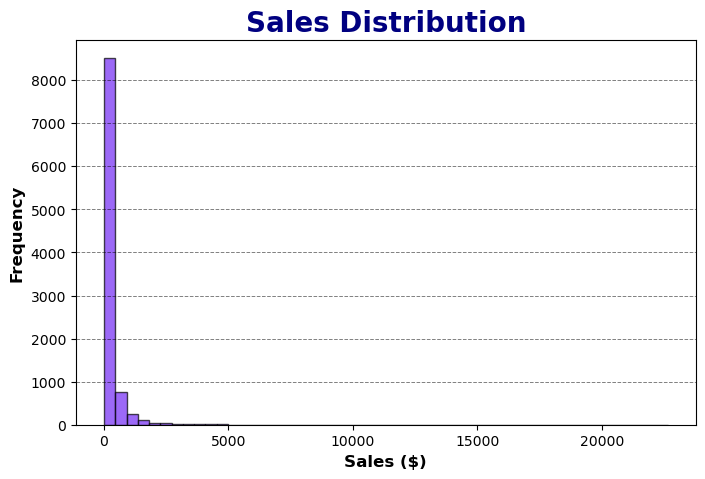

Sales Statistics:
Total Sales: $2,261,536.78
Average Sale: $230.77
Median Sale: $54.49
Maximum Sale: $22638.48
Minimum Sale: $0.44


In [42]:
# Sales Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=50, color="#7329F4", edgecolor='black', alpha=0.7)
plt.title("Sales Distribution", fontdict={'fontsize':20, 'fontweight':'bold', 'color':'navy'})
plt.xlabel("Sales ($)", fontdict={'fontsize':12, 'fontweight':'bold'})      
plt.ylabel("Frequency", fontdict={'fontsize':12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color='black')
plt.show()  

# Sales by different categories
print("Sales Statistics:")
print("="*40)

print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Average Sale: ${df['Sales'].mean():.2f}")
print(f"Median Sale: ${df['Sales'].median():.2f}")
print(f"Maximum Sale: ${df['Sales'].max():.2f}")
print(f"Minimum Sale: ${df['Sales'].min():.2f}")
print("="*40)

Categorical Analyis

In [43]:
# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Sales by Category:")
print("="*40)
print(sales_by_category)
print("="*40)

# Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Region:")
print("="*40)
print(sales_by_region)
print("="*40)

# Sales by Segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Segment:")
print("="*40)
print(sales_by_segment)
print("="*40)

# Sales by Sub-Category
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print("\nTop 10 Sub-Categories by Sales:")
print("="*40)
print(sales_by_subcategory.head(10))
print("="*40)


Sales by Category:
Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

Sales by Region:
Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

Sales by Segment:
Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

Top 10 Sub-Categories by Sales:
Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64


### Key Performance Indicators (KPIs) Calculation

Business Metrics

In [44]:
# Total Metrics
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()   
total_products = df['Product ID'].nunique()

print("\nOverall Sales Metrics:")
print("="*40)
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Total Products: {total_products:,}")
print(f"Average Order Value: ${total_sales/total_orders:,.2f}")
print(f"Average Sales per Customer: ${total_sales/total_customers:,.2f}")
print("="*40)


Overall Sales Metrics:
Total Sales: $2,261,536.78
Total Orders: 4,922
Total Customers: 793
Total Products: 1,861
Average Order Value: $459.48
Average Sales per Customer: $2,851.87


Time-Based Analysis

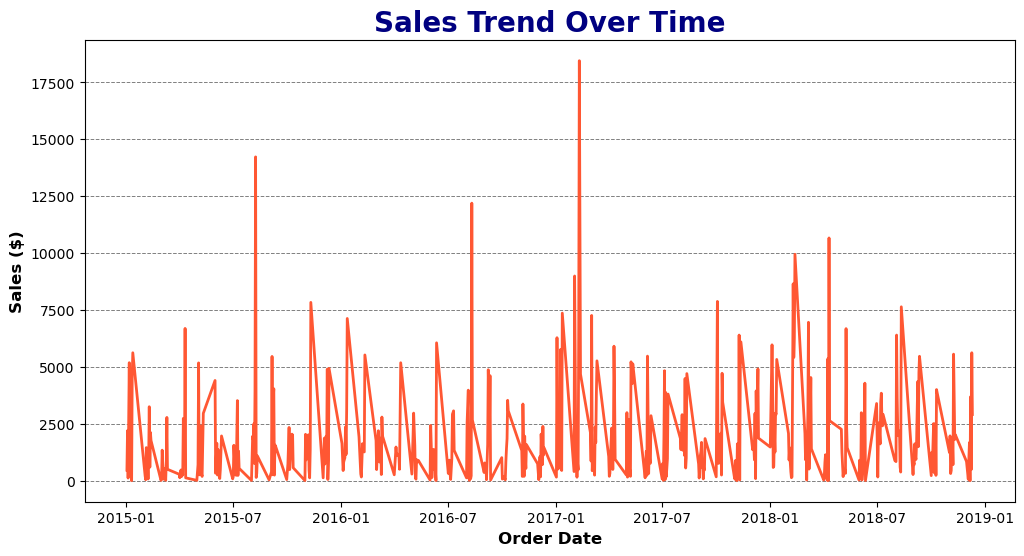


Sales by Year:
Order Year
2015.0    176986.5857
2016.0    162568.8627
2017.0    266254.6009
2018.0    266553.0743
Name: Sales, dtype: float64


In [45]:
# Sales Trend Over Time
sales_trend = df.groupby('Order Date')['Sales'].sum().reset_index() 
plt.figure(figsize=(12,6))
plt.plot(sales_trend['Order Date'], sales_trend['Sales'], color="#FF5733", linewidth=2)
plt.title("Sales Trend Over Time", fontdict={'fontsize':20, 'fontweight':'bold', 'color':'navy'})
plt.xlabel("Order Date", fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel("Sales ($)", fontdict={'fontsize':12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color='black')
plt.show()

# Sales by Year
sales_by_year = df.groupby('Order Year')['Sales'].sum()
print("\nSales by Year:")
print("="*40)
print(sales_by_year)
print("="*40)

Visualizing Sales by Category

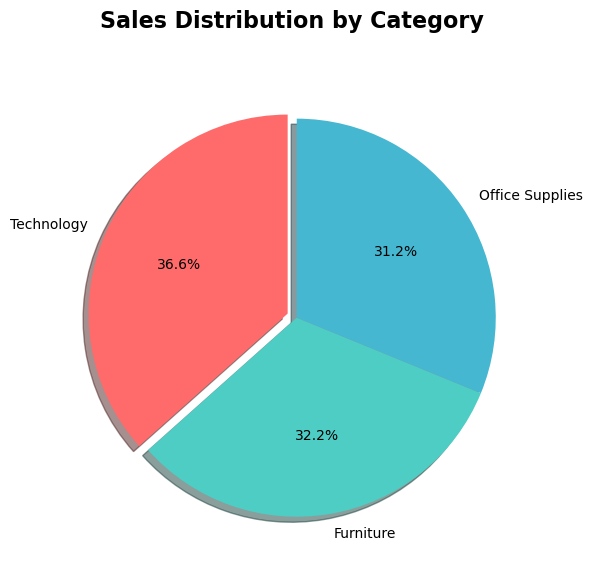


Category Sales Breakdown:
Technology     : $   827,456 ( 36.6%)
Furniture      : $   728,659 ( 32.2%)
Office Supplies: $   705,422 ( 31.2%)


In [46]:
# Pie Chart for Sales by Category
plt.figure(figsize=(6, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Create pie chart
plt.pie(sales_by_category.values, labels=sales_by_category.index, colors=colors, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=(0.05, 0, 0))

plt.title("Sales Distribution by Category", fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  
plt.tight_layout()
plt.show()

# Detailed breakdown
print("\nCategory Sales Breakdown:")
print("="*40)
for category, sales in sales_by_category.items():
    percentage = (sales / total_sales) * 100
    print(f"{category:15s}: ${sales:>10,.0f} ({percentage:>5.1f}%)")
print("="*40)




Visualizing Sales vs Order Date (Time Series Analysis)

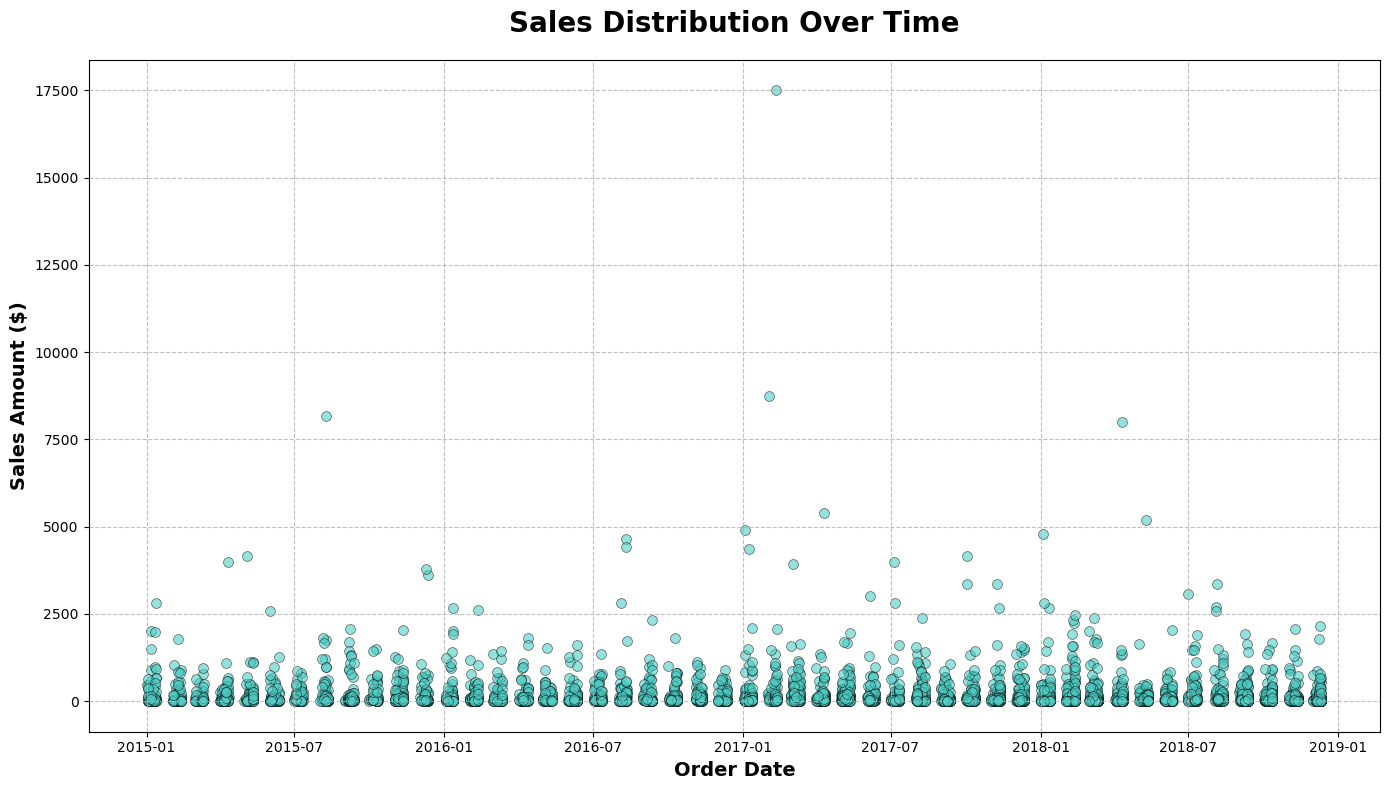


Time Series Insights:
Date Range: 2015-01-02 00:00:00 to 2018-12-11 00:00:00
Total Sales: $2,261,536.78
Average Daily Sales: $1571.60


In [50]:
plt.figure(figsize=(14, 8))
plt.scatter(df['Order Date'], df['Sales'], alpha=0.6, color='#4ECDC4', s=50, edgecolors='black', linewidth=0.5)
plt.title("Sales Distribution Over Time", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Order Date", fontsize=14, fontweight='bold')
plt.ylabel("Sales Amount ($)", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.8, linestyle='--')

plt.tight_layout()
plt.show()

print(f"\nTime Series Insights:")
print("="*60)
print(f"Date Range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Daily Sales: ${total_sales / (df['Order Date'].max() - df['Order Date'].min()).days:.2f}")
print("="*60)


Visualizing Sales By Region

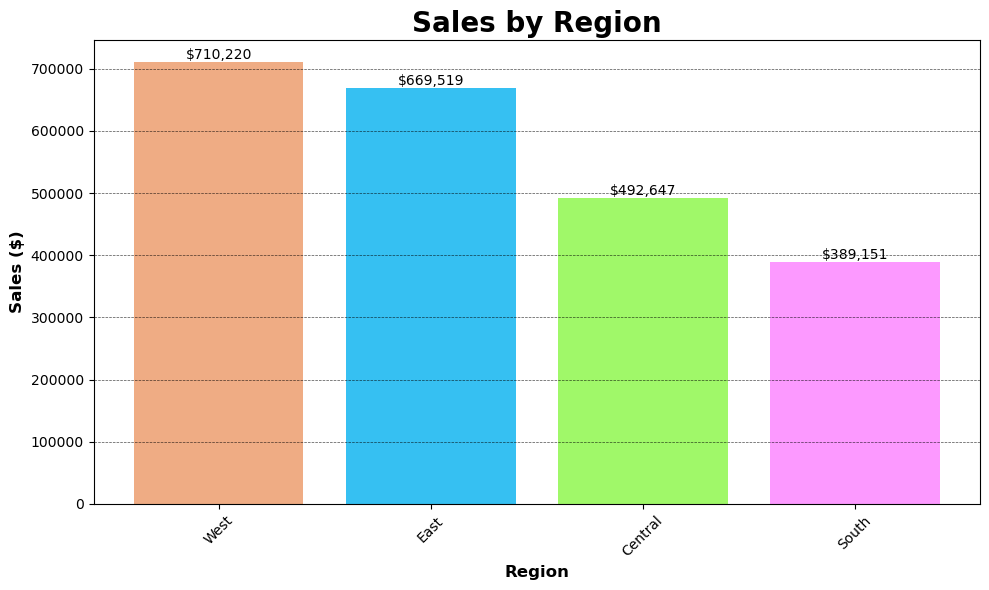


Sales Summary by Region:
West           : $  710,219.68 ( 31.4%)
East           : $  669,518.73 ( 29.6%)
Central        : $  492,646.91 ( 21.8%)
South          : $  389,151.46 ( 17.2%)


In [48]:
# Sales by Region
plt.figure(figsize=(10, 6))
colors = ["#EFAC84", "#36C0F2", "#A0F869", "#FC99FF"]
bars = plt.bar(sales_by_region.index, sales_by_region.values, color=colors)
plt.title("Sales by Region", fontsize=20, fontweight='bold')
plt.xlabel("Region", fontsize=12, fontweight='bold')
plt.ylabel("Sales ($)", fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.7, linestyle='--', linewidth=0.5, color='black')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'${height:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Summary
print("\nSales Summary by Region:")
print("="*60)
for region, sales in sales_by_region.items():
    percentage = (sales / total_sales) * 100
    print(f"{region:15s}: ${sales:>12,.2f} ({percentage:>5.1f}%)")
print("="*60)



Visualizing Top 10 Products

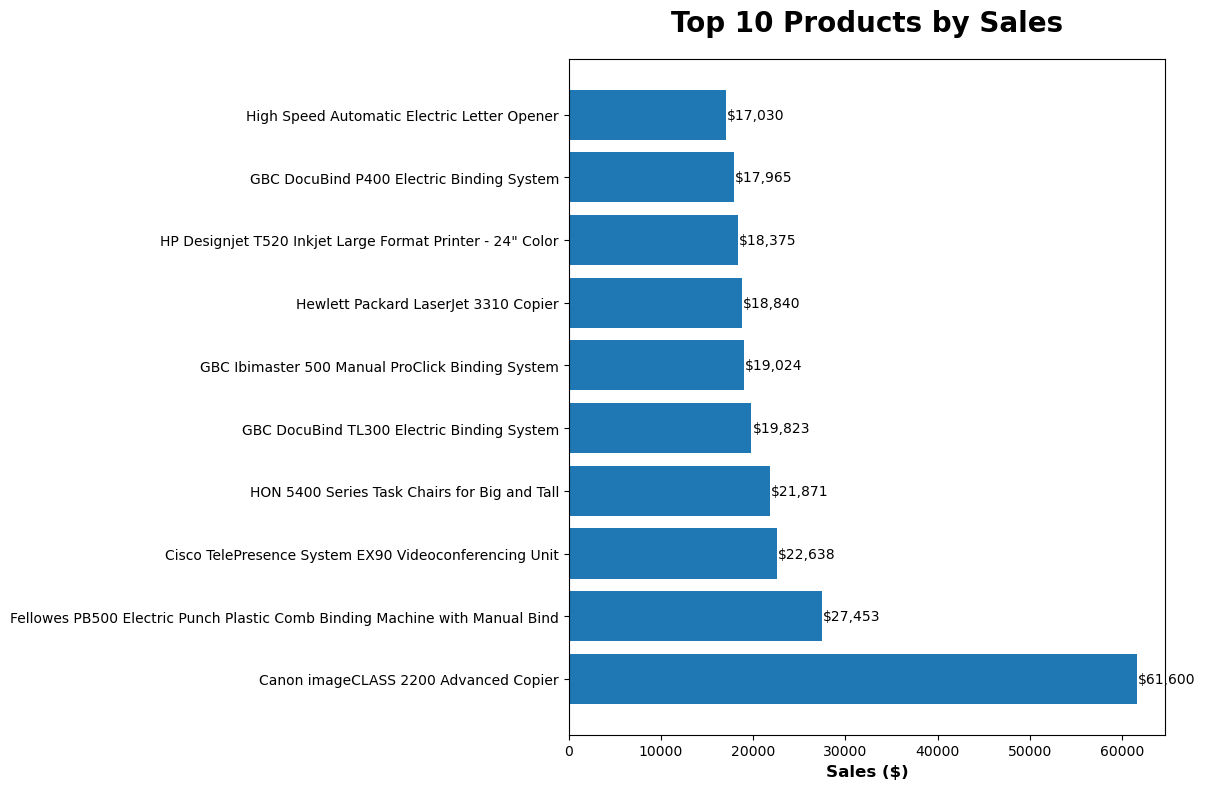


Top 10 Products by Sales Summary:
 1. Canon imageCLASS 2200 Advanced Copier             : $   61,599.82
 2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind: $   27,453.38
 3. Cisco TelePresence System EX90 Videoconferencing Unit: $   22,638.48
 4. HON 5400 Series Task Chairs for Big and Tall      : $   21,870.58
 5. GBC DocuBind TL300 Electric Binding System        : $   19,823.48
 6. GBC Ibimaster 500 Manual ProClick Binding System  : $   19,024.50
 7. Hewlett Packard LaserJet 3310 Copier              : $   18,839.69
 8. HP Designjet T520 Inkjet Large Format Printer - 24" Color: $   18,374.90
 9. GBC DocuBind P400 Electric Binding System         : $   17,965.07
10. High Speed Automatic Electric Letter Opener       : $   17,030.31


In [49]:
# Top 10 Products 
plt.figure(figsize=(12, 8))
top_10_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
bars = plt.barh(range(len(top_10_products)), top_10_products.values)
plt.yticks(range(len(top_10_products)), top_10_products.index, fontsize=10)
plt.title("Top 10 Products by Sales", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Sales ($)", fontsize=12, fontweight='bold')
for i, v in enumerate(top_10_products.values):
    plt.text(v + 100, i, f'${v:,.0f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# Summary
print("\nTop 10 Products by Sales Summary:")
print("="*100)
for i, (product, sales) in enumerate(top_10_products.items(), start=1):
    print(f"{i:2d}. {product:50s}: ${sales:>12,.2f}")
print("="*100)


## Major Insights

1. Sales Performance: Total sales exceeded $2.2 million with Technology as the top category
2. Regional Analysis: West region showed strongest performance with significant growth potential
3. Product Analysis: Identified top-selling products and optimal inventory strategies